In [3]:
import MDAnalysis as mda
atomistic_system = mda.Universe
from modules.distances import *
from modules.dssp import dssp
from modules.input import res_list
%reload_ext autoreload
%autoreload 2
import input

In [5]:
atomistic_system, reference_structure, energy_like_terms, is_aligned = input.read_files()
is_aligned = input.align_traj(is_aligned)

Aligned file found, reading this instead
Trajectory allready aligned, delete md250ns_center_po_aligned.xtc to rerun alignement


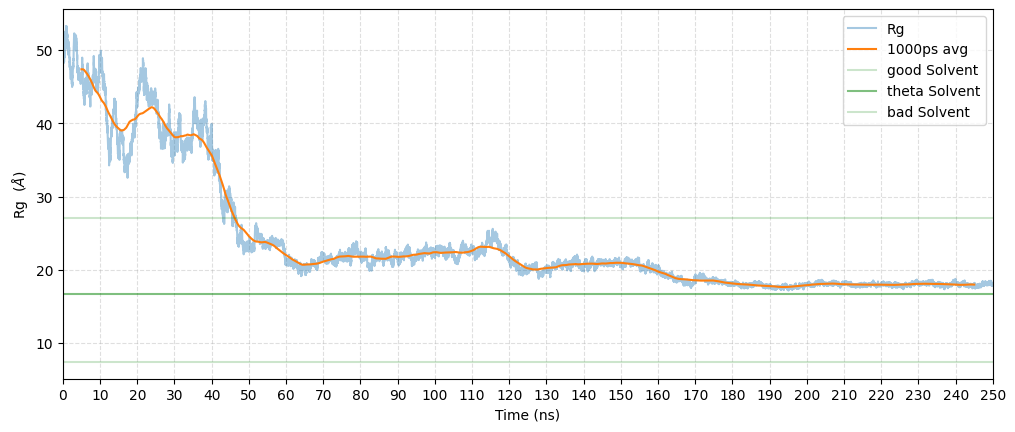

In [9]:
Rgyr = Rg(atomistic_system)

In [4]:
distances_3Darray = calculate_3D_distance(atomistic_system)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


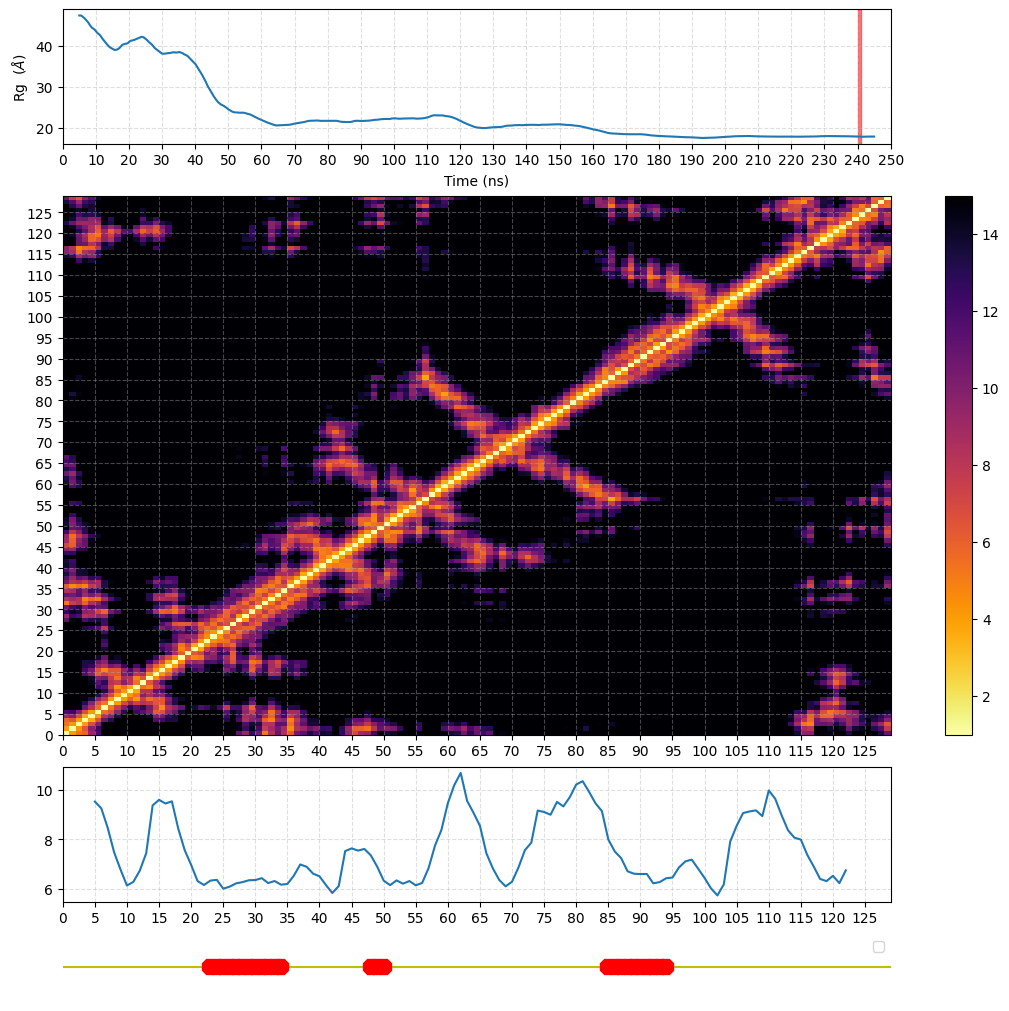

In [5]:
dist_max = 15
contact_start = 240
contact_finish = 241

atomistic_system.trajectory[contact_start*100]
protein = atomistic_system.select_atoms("protein")
dsspline = dssp(protein)

plot_distances_HD(Rgyr, distances_3Darray, contact_start, contact_finish, dist_max, dsspline, do_rolling_Rgs=True, atomistic_system=atomistic_system)
    
## Extras
#plot_distances_slices(distances_3Darray, contact_start, contact_finish, dist_max)
#mean = np.mean(distances_3Darray[contact_start *100 : contact_finish *100], axis=0)
#np.savetxt(f"{sim_path}distances_avg_{contact_start}ns-{contact_finish}ns.csv", mean, delimiter="," )
cutoff = 12
#plot_every_diagonal(distances_3Darray, contact_start,contact_finish, cutoff) ## it's pretty terrible don't look at it

In [6]:
res_list(atomistic_system)

['SER1', 'SER2', 'SER3', 'ALA4', 'PRO5', 'ALA6', 'ARG7', 'SER8', 'SER9', 'SER10', 'ALA11', 'SER12', 'LYS13', 'LYS14', 'ALA15', 'VAL16', 'THR17', 'PRO18', 'SER19', 'ARG20', 'SER21', 'ALA22', 'LEU23', 'PRO24', 'SER25', 'ASN26', 'TRP27', 'LYS28', 'GLN29', 'GLU30', 'LEU31', 'GLU32', 'SER33', 'LEU34', 'ARG35', 'SER36', 'SER37', 'SER38', 'PRO39', 'ALA40', 'PRO41', 'ALA42', 'SER43', 'SER44', 'ALA45', 'PRO46', 'ALA47', 'PRO48', 'ALA49', 'ARG50', 'SER51', 'SER52', 'SER53', 'ALA54', 'SER55', 'TRP56', 'ARG57', 'ASP58', 'ALA59', 'ALA60', 'PRO61', 'ALA62', 'SER63', 'SER64', 'ALA65', 'PRO66', 'ALA67', 'ARG68', 'SER69', 'SER70', 'SER71', 'SER72', 'LYS73', 'LYS74', 'ALA75', 'VAL76', 'THR77', 'PRO78', 'SER79', 'ARG80', 'SER81', 'ALA82', 'LEU83', 'PRO84', 'SER85', 'ASN86', 'TRP87', 'LYS88', 'GLN89', 'GLU90', 'LEU91', 'GLU92', 'SER93', 'LEU94', 'ARG95', 'SER96', 'SER97', 'SER98', 'PRO99', 'ALA100', 'PRO101', 'ALA102', 'SER103', 'SER104', 'ALA105', 'PRO106', 'ALA107', 'PRO108', 'ALA109', 'ARG110', 'SER111

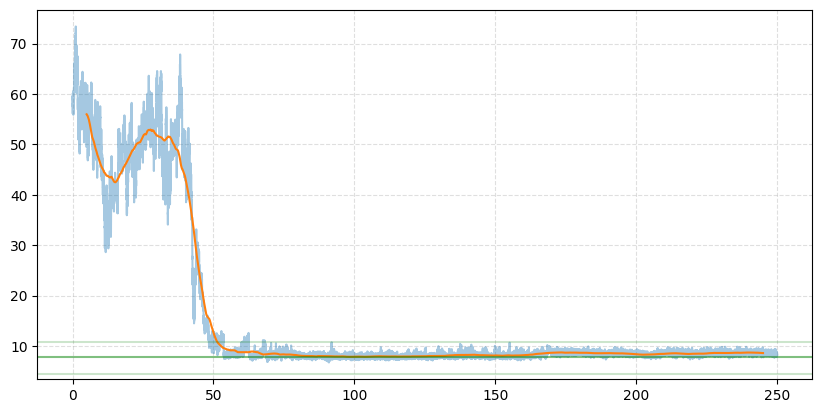

In [7]:
seleA = "resid 56"
seleB = "resid 84"
random_walk_steps = 28
sele_distance(atomistic_system, seleA, seleB, random_walk_steps)